# 구글플레이 스토어 앱 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

In [2]:
data = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/googleplaystore.csv")

In [3]:
# 데이터 미리보기
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# 데이터 행,열 갯수 보기
data.shape

(10841, 13)

In [5]:
# 데이터 칼럼 정보 보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# 결측치 보기 
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# 데이터 칼럼 종류 보기
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### 데이터에서 의미가 애매한 칼럼별 kaggle 데이터 칼럼 설명을 통해 이해하기
- Rating : 해당 앱에 대한 사용자들의 전반적인 평점
- Reviews : 해당 앱에 대한 사용자들의 리뷰(평가) 갯수
- Size : 해당 앱 용량(ex. 메가바이트(M), 기가바이트(G) 등...)
- Installs : 사용자들이 해당 앱을 다운로드(설치)한 횟수
- Type : 무료앱(free)인지 유료앱(Paid)인지
- Price : 해당 앱의 가격(Type이 free이면 0)
- Content Rating : 해당 앱이 타겟팅한 연령대
- Genres : 해당 앱이 속한 장르(단, 하나의 앱이 여러개의 장르에 속할 수 있음)
- Last Updated : 해당 앱이 가장 마지막으로 업데이트 된 날짜
- Current Ver: 현재 플레이스토어에서 사용가능한 해당 앱의 버전
- Android Ver : 해당 앱을 실행할 수 있는 최소한의 Android 버전

In [8]:
data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [9]:
# 데이터 칼럼명 알아보기 쉽게 한글이름으로 바꾸기
data.columns = ['앱이름','분류','평가','리뷰개수','앱용량','앱설치횟수','무료/유료앱','앱가격','앱의타겟연령층','앱장르',
               '최신업데이트날짜','현재사용가능앱버전','안드로이드최소버전']

In [10]:
data.head(1)

,앱이름,분류,평가,리뷰개수,앱용량,앱설치횟수,무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   앱이름        10841 non-null  object 
 1   분류         10841 non-null  object 
 2   평가         9367 non-null   float64
 3   리뷰개수       10841 non-null  object 
 4   앱용량        10841 non-null  object 
 5   앱설치횟수      10841 non-null  object 
 6   무료/유료앱     10840 non-null  object 
 7   앱가격        10841 non-null  object 
 8   앱의타겟연령층    10840 non-null  object 
 9   앱장르        10841 non-null  object 
 10  최신업데이트날짜   10841 non-null  object 
 11  현재사용가능앱버전  10833 non-null  object 
 12  안드로이드최소버전  10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
data.isnull().sum()

앱이름             0
분류              0
평가           1474
리뷰개수            0
앱용량             0
앱설치횟수           0
무료/유료앱          1
앱가격             0
앱의타겟연령층         1
앱장르             0
최신업데이트날짜        0
현재사용가능앱버전       8
안드로이드최소버전       3
dtype: int64

In [13]:
# 결측치 없애고 결측치 대체하기 위해 결측치 있는 칼럼들의 값 종류들 보기

print(data['평가'].unique()) # float  # na값 0으로 대체
print()
print(data['앱의타겟연령층'].unique()) # string  # na값 Unrated 로 대체
print()
print(data['현재사용가능앱버전'].unique()) # string  # na값 Unknown 으로 대체
print()
print(data['안드로이드최소버전'].unique()) # string  # na값 Unknown 으로 대체

[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]

['1.0.0' '2.0.0' '1.2.4' ... '1.0.612928' '0.3.4' '2.0.148.0']

['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4W and up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1' nan
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1']


In [14]:
# 결측치 자료 대체
data['평가'] = data['평가'].fillna(0)
data['앱의타겟연령층'] = data['앱의타겟연령층'].fillna('Unrated')
data['현재사용가능앱버전'] = data['현재사용가능앱버전'].fillna('Unknown')
data['안드로이드최소버전'] = data['안드로이드최소버전'].fillna('Unknown')

In [15]:
# 결측지 자료 대체됬는지 확인
data.isnull().sum()

앱이름          0
분류           0
평가           0
리뷰개수         0
앱용량          0
앱설치횟수        0
무료/유료앱       1
앱가격          0
앱의타겟연령층      0
앱장르          0
최신업데이트날짜     0
현재사용가능앱버전    0
안드로이드최소버전    0
dtype: int64

In [16]:
# 무료/유료앱 결측치 빼먹어서 확인
data['무료/유료앱'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [17]:
# value값들이 밀려 써있는 행 확인 -> 삭제 후 수정한 데이터 다시 concat으로 병합해주자
a = data.loc[data['무료/유료앱'] == '0']
a

,앱이름,분류,평가,리뷰개수,앱용량,앱설치횟수,무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Unrated,"February 11, 2018",1.0.19,4.0 and up,Unknown


In [18]:
# 잘못해서 밀려진 데이터 삭제
data = data.drop(index=10472, axis=0)
# 해당 데이터 삭제됬는지 확인 -> 삭제 완료!
data.loc[data['무료/유료앱'] == '0']

,앱이름,분류,평가,리뷰개수,앱용량,앱설치횟수,무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전


In [19]:
# 밀려진 데이터 행(row)을 수정한 데이터프레임 새로 만들기
revised_row = {'앱이름':'Life Made WI-Fi Touchscreen', '분류':'Photo Frame', '평가':1.9,'리뷰개수':'19.0',
             '앱용량':'3.0M', '앱설치횟수':'1,000+', '무료/유료앱':'Free', '앱가격':'0', '앱의타겟연령층':'Everyone',
             '앱장르':'Unrated', '최신업데이트날짜':'February 11, 2018', '현재사용가능앱버전':'1.0.19',
             '안드로이드최소버전':'4.0 and up'}
revised_df = pd.DataFrame(revised_row, index=[0])
revised_df

,앱이름,분류,평가,리뷰개수,앱용량,앱설치횟수,무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
0,Life Made WI-Fi Touchscreen,Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Unrated,"February 11, 2018",1.0.19,4.0 and up


In [20]:
# 수정한 데이터 원래 데이터에 concat 사용해 병합 --> [ ] 안에 df넣자!
data = pd.concat([data, revised_df])

In [21]:
# 수정된 데이터 잘 들어갔는지 '앱이름'을 통해서 조회해보기
data.loc[data['앱이름'] == 'Life Made WI-Fi Touchscreen']

,앱이름,분류,평가,리뷰개수,앱용량,앱설치횟수,무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
0,Life Made WI-Fi Touchscreen,Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Unrated,"February 11, 2018",1.0.19,4.0 and up


In [22]:
# 이번엔 nan 데이터 확인해보기
data['무료/유료앱'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [23]:
# 앱 가격이 0 인것으로 보아 Free로 설정하자!
data.loc[data['무료/유료앱'].isnull()] 

,앱이름,분류,평가,리뷰개수,앱용량,앱설치횟수,무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
9148,Command & Conquer: Rivals,FAMILY,0.0,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [24]:
data['무료/유료앱'] = data['무료/유료앱'].fillna('Free')

In [25]:
# 결측치 모두 제거 완료
data.isnull().sum()

앱이름          0
분류           0
평가           0
리뷰개수         0
앱용량          0
앱설치횟수        0
무료/유료앱       0
앱가격          0
앱의타겟연령층      0
앱장르          0
최신업데이트날짜     0
현재사용가능앱버전    0
안드로이드최소버전    0
dtype: int64

In [26]:
data.head()

,앱이름,분류,평가,리뷰개수,앱용량,앱설치횟수,무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10841 entries, 0 to 0
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   앱이름        10841 non-null  object 
 1   분류         10841 non-null  object 
 2   평가         10841 non-null  float64
 3   리뷰개수       10841 non-null  object 
 4   앱용량        10841 non-null  object 
 5   앱설치횟수      10841 non-null  object 
 6   무료/유료앱     10841 non-null  object 
 7   앱가격        10841 non-null  object 
 8   앱의타겟연령층    10841 non-null  object 
 9   앱장르        10841 non-null  object 
 10  최신업데이트날짜   10841 non-null  object 
 11  현재사용가능앱버전  10841 non-null  object 
 12  안드로이드최소버전  10841 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [28]:
# 앱용량이 메가바이트(M만) 있는지 확인해보기
data['앱용량'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [29]:
# 용량을 수치화 하기 위해 앱용량이 'Varies with device'인 행들(1000개정도)을 제거한 DataFrame 생성
app_capacity = data.loc[data['앱용량'] != 'Varies with device']
app_capacity.shape

(9146, 13)

In [30]:
app_capacity.head()

,앱이름,분류,평가,리뷰개수,앱용량,앱설치횟수,무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
# 단위 변환을 위해서 메가바이트(M) , 킬로바이트(K) 별로 데이터프레임을 쪼개고 1M = 1000K 로 계산을 해준 후 다시 병합하기
mega_df = app_capacity.loc[app_capacity['앱용량'].str.contains('M')]
kilo_df = app_capacity.loc[app_capacity['앱용량'].str.contains('k')]

In [32]:
# 경고메세지 무시
import warnings
warnings.filterwarnings(action='ignore')

In [33]:
# 앱용량 값들 M 제거해주기
mega_df['앱용량'] = mega_df['앱용량'].str.replace('M','')

In [34]:
# 제거했는지 보기
mega_df.head()

,앱이름,분류,평가,리뷰개수,앱용량,앱설치횟수,무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [35]:
kilo_df['앱용량'] = kilo_df['앱용량'].str.replace('k','')

In [36]:
kilo_df.head()

,앱이름,분류,평가,리뷰개수,앱용량,앱설치횟수,무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,79,"10,000,000+",Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up
450,Caller ID +,COMMUNICATION,4.0,9498,118,"1,000,000+",Free,0,Everyone,Communication,"June 7, 2016",5.28.0,2.3 and up
458,GO Notifier,COMMUNICATION,4.2,124346,695,"10,000,000+",Free,0,Everyone,Communication,"July 6, 2014",2.8,2.0 and up


In [37]:
# 메가바이트와 킬로바이트 데이터프레임의 '앱용량' 칼럼을 float형으로 바꿔주기
mega_df['앱용량'] = mega_df['앱용량'].astype(float)
kilo_df['앱용량'] = kilo_df['앱용량'].astype(float)

In [38]:
# 잘바뀌었는지 확인
print(mega_df.info())
print()
print(kilo_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8830 entries, 0 to 0
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   앱이름        8830 non-null   object 
 1   분류         8830 non-null   object 
 2   평가         8830 non-null   float64
 3   리뷰개수       8830 non-null   object 
 4   앱용량        8830 non-null   float64
 5   앱설치횟수      8830 non-null   object 
 6   무료/유료앱     8830 non-null   object 
 7   앱가격        8830 non-null   object 
 8   앱의타겟연령층    8830 non-null   object 
 9   앱장르        8830 non-null   object 
 10  최신업데이트날짜   8830 non-null   object 
 11  현재사용가능앱버전  8830 non-null   object 
 12  안드로이드최소버전  8830 non-null   object 
dtypes: float64(2), object(11)
memory usage: 965.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 58 to 10833
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   앱이름        316 non-null    object 
 1   분류

In [39]:
# 킬로바이트를 메가바이트 용량으로 바꿔주기 위해서 킬로바이트 칼럼값에 모두 0.001을 곱해준다.
kilo_df['앱용량'] = kilo_df['앱용량'].mul(0.001)
kilo_df.head()

,앱이름,분류,평가,리뷰개수,앱용량,앱설치횟수,무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,0.201,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,0.023,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,0.079,"10,000,000+",Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up
450,Caller ID +,COMMUNICATION,4.0,9498,0.118,"1,000,000+",Free,0,Everyone,Communication,"June 7, 2016",5.28.0,2.3 and up
458,GO Notifier,COMMUNICATION,4.2,124346,0.695,"10,000,000+",Free,0,Everyone,Communication,"July 6, 2014",2.8,2.0 and up


In [40]:
# 이제 두 개의 데이터프레임(메가바이트, 킬로바이트)를 서로 concat으로 합쳐주자
app_capacity = pd.concat([mega_df, kilo_df])

In [41]:
app_capacity.head()

,앱이름,분류,평가,리뷰개수,앱용량,앱설치횟수,무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [42]:
# 앱용량 칼럼에 MB 기준으로 써주자 
# 특정 칼럼명 변경방법은 .rename(columns={'기존칼럼':'새칼럼명'}, inplace=True)  False하면 안바뀜!
app_capacity.rename(columns={'앱용량':'앱용량MB'}, inplace=True)

In [43]:
app_capacity.head(1)

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수,무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [44]:
# 리뷰 갯수 값들 전처리 : str -> float -> int형으로 대체(리뷰개수가 소수점이라는 것은 없으니까!)
app_capacity['리뷰개수'] = app_capacity['리뷰개수'].astype(float)
app_capacity['리뷰개수'] = app_capacity['리뷰개수'].astype(int)

In [45]:
# 앱 설치횟수 값들 전처리 
app_capacity['앱설치횟수'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

In [46]:
# 앱 설치횟수 칼럼값들 문자열제거 후 int형으로 변환하고 칼럼명 수정(앱설치횟수(이상))   
                                                                            # *이상: ex) 5 -> 5번이상 다운로드 의미

In [47]:
app_capacity['앱설치횟수'] = app_capacity['앱설치횟수'].str.replace(",","")
app_capacity['앱설치횟수'] = app_capacity['앱설치횟수'].str.replace("+","")
app_capacity['앱설치횟수'] = app_capacity['앱설치횟수'].astype(int)

In [48]:
app_capacity['앱설치횟수'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,         50,        100,        500,
               10,          1,          5, 1000000000,          0])

In [49]:
app_capacity.rename(columns={'앱설치횟수':'앱설치횟수(이상)'}, inplace=True)
app_capacity.head(1)

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격,앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [50]:
app_capacity['앱가격'].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$3.99', '$7.99', '$5.99', '$2.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99',
       '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00', '$3.88',
       '$25.99', '$399.99', '$17.99', '$400.00', '$3.02', '$1.76',
       '$4.84', '$4.77', '$1.61', '$1.59', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$8.99', '$1.96', '$19.40', '$15.46', '$3.04', '$4.29',
       '$2.60', '$3.28', '$4.60', '$28.99', '$10.99', '$2.90', '$1.97',
       '$200.00', '$89.99', '$2.56', '$30.99', '$3.61', '$394.99',
       '$1.26', '$6.49', '$1.20', '$1.29', '$5.00', '$4.80', '$1.04'],
      dtype=object)

In [51]:
# 앱가격 값들 문자열 제거후 float형으로 바꿔주기
app_capacity['앱가격'] = app_capacity['앱가격'].str.replace("$","")
app_capacity['앱가격'] = app_capacity['앱가격'].astype(float)

In [52]:
# 칼럼명 수정 후 잘 수정됬는지 확인
app_capacity.rename(columns={'앱가격':'앱가격($)'}, inplace=True)
app_capacity.loc[app_capacity['앱가격($)'] != 0.0]

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.800,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.800,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
477,Calculator,DATING,2.6,57,6.200,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10460,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142,0.026,5000,Paid,1.00,Everyone,Tools,"June 26, 2011",1.0.0,2.1 and up
10675,Circle Colors Pack-FN Theme,PERSONALIZATION,4.2,6,0.089,50,Paid,0.99,Everyone,Personalization,"August 9, 2013",1.0,2.2 and up
10690,FO Bixby,PERSONALIZATION,5.0,5,0.861,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10735,FP VoiceBot,FAMILY,0.0,17,0.157,100,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up


In [53]:
## 앱의 타겟연령층부터 전처리하기! 다시 작업할때 위에서부터 reload 하기

In [54]:
app_capacity.head()

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르,최신업데이트날짜,현재사용가능앱버전,안드로이드최소버전
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [55]:
# 최신업데이트날짜, 현재사용가능앱버전, 안드로이드최소버전 -> 필요없는 칼럼으로 제거

google_df = app_capacity.drop(['최신업데이트날짜','현재사용가능앱버전','안드로이드최소버전'], axis=1).copy()

In [56]:
google_df.head(2)

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play


In [57]:
google_df['분류'].value_counts()

FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Photo Frame               1
Name: 분류, dtype: int64

In [58]:
category_df = pd.DataFrame(google_df.groupby(['분류'])['분류'].count())
category_df.columns=['개수']
category_df = category_df.reset_index()
category_df.head()

,분류,개수
0,ART_AND_DESIGN,62
1,AUTO_AND_VEHICLES,75
2,BEAUTY,47
3,BOOKS_AND_REFERENCE,197
4,BUSINESS,400


In [59]:
from plotnine import * 
import seaborn as sns
import matplotlib as mplt

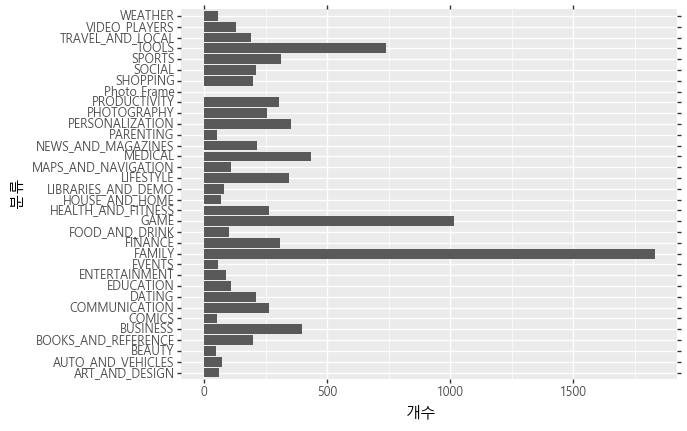

<ggplot: (140995538138)>

In [60]:
(ggplot(category_df)
 +aes(x='분류', y='개수')
 +geom_bar(stat='identity')
 +coord_flip()
 +theme(text=element_text(family='Malgun Gothic'))
)

In [61]:
google_df.head()

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


In [62]:
google_df['평점대'] = ''

In [63]:
google_df['평가'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 0. , 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 5. , 2.6, 3.1, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [64]:
# 평가 점수에 따라 평점 범위를 나눠서 새로운 칼럼 추가하기
google_df.loc[google_df['평가'] >= 4, '평점대'] = 4
google_df.loc[(google_df['평가'] < 4) & (google_df['평가'] >= 3), '평점대'] = 3
google_df.loc[(google_df['평가'] < 3) & (google_df['평가'] >= 2), '평점대'] = 2
google_df.loc[(google_df['평가'] < 2) & (google_df['평가'] >= 1), '평점대'] = 1
google_df.loc[(google_df['평가'] < 1) & (google_df['평가'] >= 0), '평점대'] = 0
google_df.head()

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르,평점대
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,4


Text(0, 0.5, '평가')

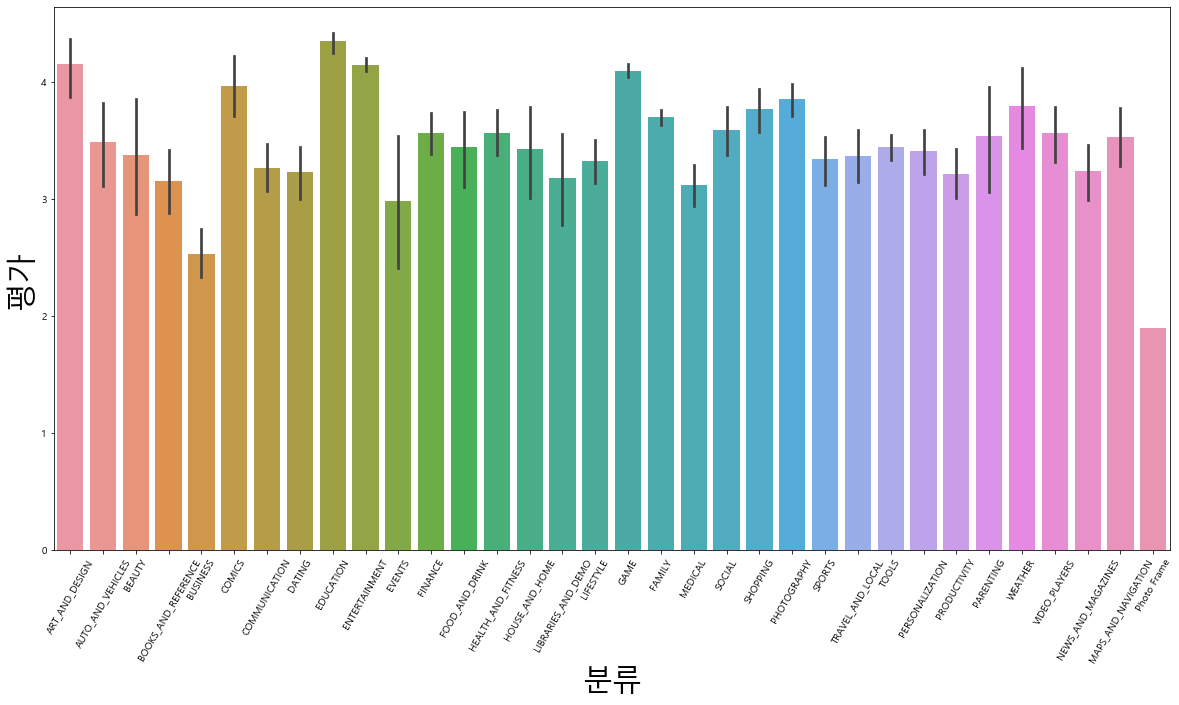

In [65]:
# 분류별로 평가 점수 평균값 seaborn으로 나타내기
plt.figure(figsize=(20,10))
sns.barplot(data=google_df, x='분류', y='평가')
plt.xticks(rotation=60)
plt.xlabel('분류',fontsize=30)
plt.ylabel('평가',fontsize=30)


Text(0, 0.5, '앱용량MB')

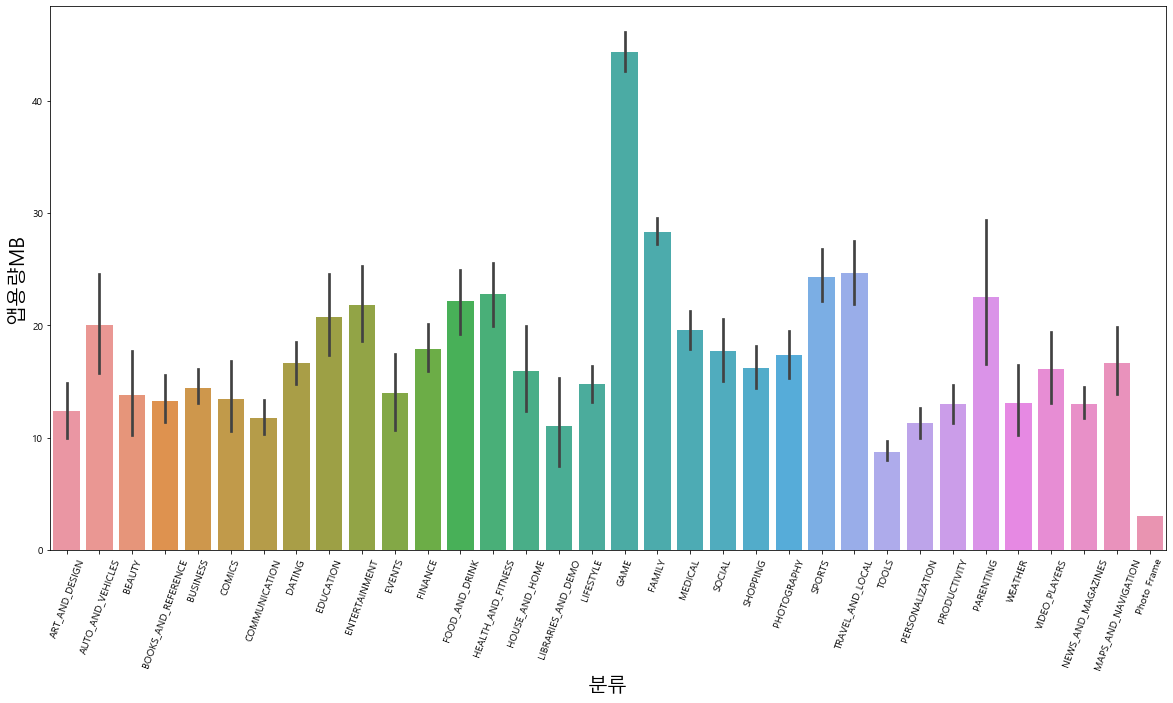

In [66]:
plt.figure(figsize=(20,10))
sns.barplot(data=google_df, x='분류', y='앱용량MB')
plt.xticks(rotation=70)
plt.xlabel('분류', fontsize=20)
plt.ylabel('앱용량MB', fontsize=20)

In [67]:
google_df.head()

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르,평점대
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,4


In [66]:
# 무료/유료 앱 갯수 몇개인지 찾아보기
price_df = pd.DataFrame(google_df.groupby(['무료/유료앱'])['무료/유료앱'].count())
price_df.columns = ['개수']
price_df = price_df.reset_index()
price_df

,무료/유료앱,개수
0,Free,8422
1,Paid,724


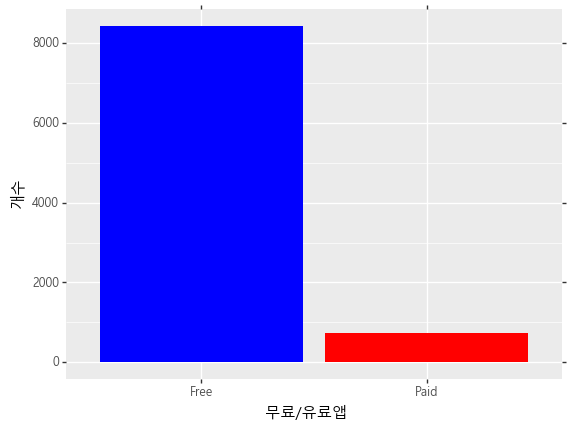

<ggplot: (140995834134)>

In [67]:
(ggplot(price_df)
 +aes(x='무료/유료앱', y='개수')
 +geom_bar(stat='identity', fill=('blue','red'))
 +theme(text=element_text(family="Malgun Gothic"))
)

In [68]:
# 유료앱 가격의 평균가격은 얼마일까
# 가격이 유료인 데이터행들만 추출하자
paid_df = google_df.loc[google_df['무료/유료앱'] == 'Paid']
paid_df.head()

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르,평점대
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,4
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,4
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,4
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,4
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2


In [69]:
paid_df['분류'].unique()

array(['BUSINESS', 'DATING', 'EDUCATION', 'ENTERTAINMENT',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'GAME', 'FAMILY',
       'MEDICAL', 'PHOTOGRAPHY', 'SPORTS', 'PERSONALIZATION', 'WEATHER',
       'TOOLS', 'PRODUCTIVITY', 'LIFESTYLE', 'COMMUNICATION',
       'NEWS_AND_MAGAZINES', 'SHOPPING', 'AUTO_AND_VEHICLES', 'SOCIAL',
       'ART_AND_DESIGN', 'BOOKS_AND_REFERENCE', 'FINANCE',
       'MAPS_AND_NAVIGATION', 'TRAVEL_AND_LOCAL', 'PARENTING',
       'LIBRARIES_AND_DEMO', 'EVENTS', 'VIDEO_PLAYERS'], dtype=object)

Text(0, 0.5, '앱가격($)')

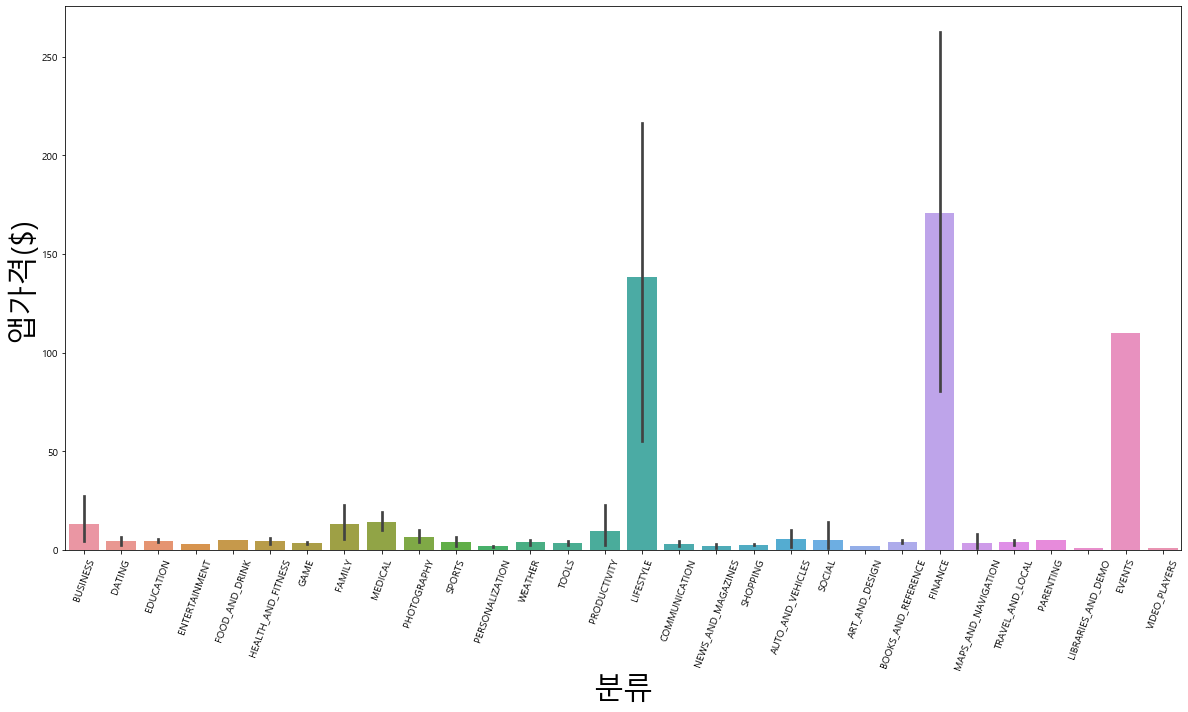

In [70]:
plt.figure(figsize=(20,10))
sns.barplot(data=paid_df, x='분류', y='앱가격($)')
plt.xticks(rotation=70)
plt.xlabel('분류', fontsize=30)
plt.ylabel('앱가격($)', fontsize=30)

In [71]:
# 가장 높은 평균가격을 기록한 유료앱 FiNANCE 분류에 속하는 앱들은 정확히 뭘까? 그리고 그중에서도 가장 평점이 좋은게 뭘까?
paid_df.head()

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르,평점대
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,4
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,4
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,4
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,4
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2


In [72]:
finance_df = paid_df.loc[paid_df['분류'] == 'FINANCE']
finance_df.head()

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르,평점대
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,Finance,4
5358,I am Rich!,FINANCE,3.8,93,22.0,1000,Paid,399.99,Everyone,Finance,3
5361,I am Rich Premium Plus,FINANCE,4.6,459,2.0,10000,Paid,18.99,Everyone,Finance,4
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7,1000,Paid,399.99,Teen,Finance,4
5369,I am Rich,FINANCE,4.3,180,3.8,5000,Paid,399.99,Everyone,Finance,4


In [73]:
finance_df['앱가격($)'].max()

399.99

In [74]:
finance_max = finance_df.loc[finance_df['앱가격($)'] == 399.99]
finance_max

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르,평점대
5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000,Paid,399.99,Everyone,Finance,4
5358,I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.99,Everyone,Finance,3
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.700,1000,Paid,399.99,Teen,Finance,4
5369,I am Rich,FINANCE,4.3,180,3.800,5000,Paid,399.99,Everyone,Finance,4
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000,1000,Paid,399.99,Everyone,Finance,4
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,3


Text(14.550000000000004, 0.5, '평가')

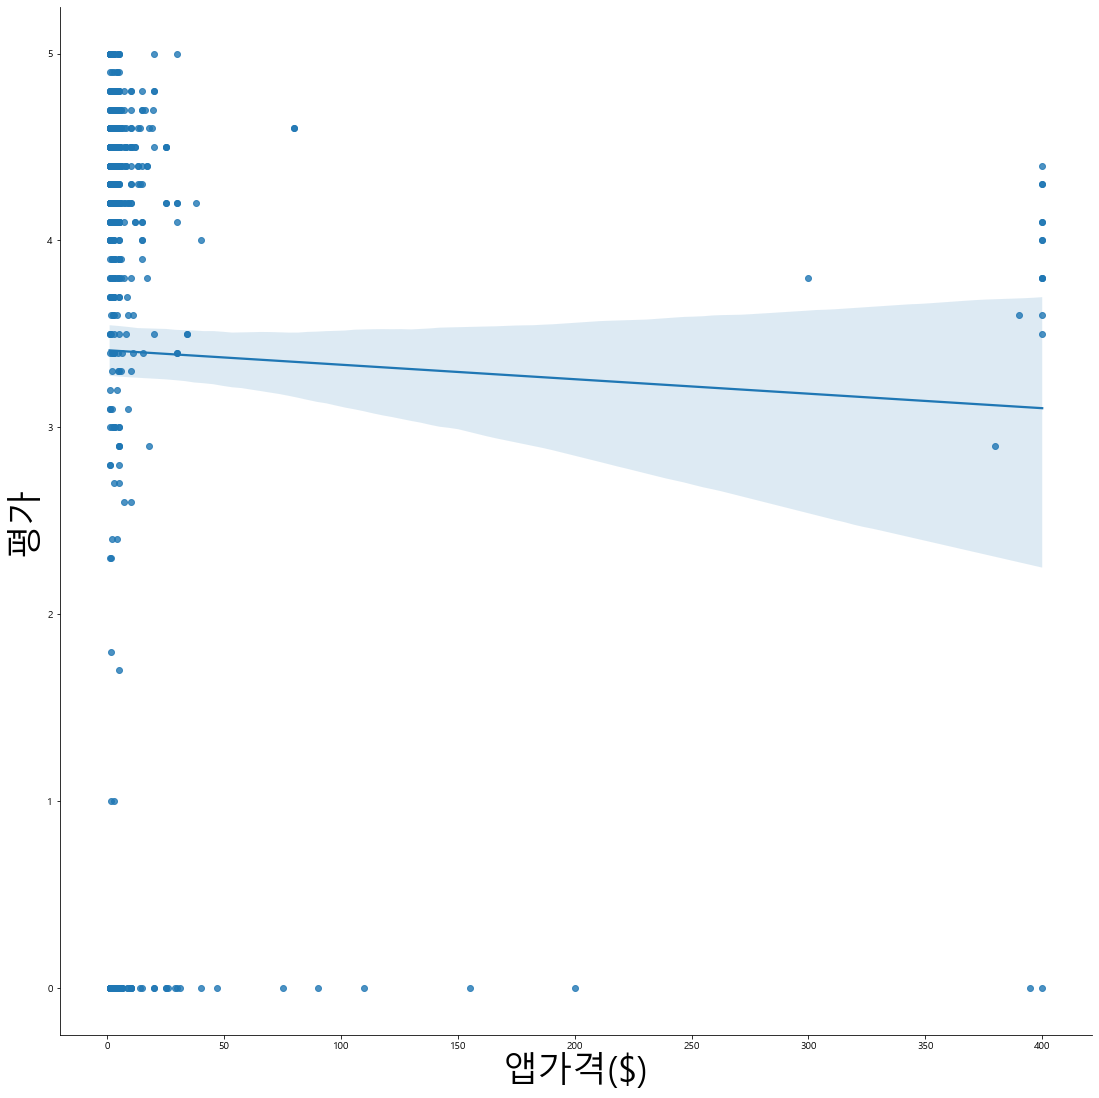

In [75]:
# 가격이 높을수록 평가(평점)이 높을까?         # lmplot 그래프 사이즈 늘리기
sns.lmplot(data=paid_df, x='앱가격($)', y='평가', size=15)
plt.xlabel('앱가격($)', fontsize=35)
plt.ylabel('평가', fontsize=35)

# 앱 가격이 비싸다고 평점이 높은것은 아니다 오히려 무료에 가까운 앱이 평점이 더 높은 경우가 많았다.

In [76]:
google_df.head()

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르,평점대
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,4


In [77]:
# 앱용량이 가장 많은 Game 앱들을 살펴보자
game = google_df.loc[google_df['분류'] == 'GAME']
game.shape

(1015, 11)

In [78]:
game.head()

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르,평점대
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,4
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,4
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,4
1656,Solitaire,GAME,4.7,254258,23.0,10000000,Free,0.0,Everyone,Card,4
1657,Bubble Shooter,GAME,4.5,148897,46.0,10000000,Free,0.0,Everyone,Casual,4


In [79]:
game.describe()
# Game 앱들의 평점 평균값이 4.0이고 사분위수 값들이 모두 4.0 대인것으로 보아 Game 앱은 평균적으로 좋은 평가를 받고 있다.

,평가,리뷰개수,앱용량MB,앱설치횟수(이상),앱가격($)
count,1015.000000,1.015000e+03,1015.000000,1.015000e+03,1015.000000
mean,4.097044,1.330281e+06,44.370099,2.943307e+07,0.275212
std,0.918574,4.303622e+06,27.741592,9.998677e+07,1.313592
min,0.000000,0.000000e+00,0.116000,1.000000e+00,0.000000
25%,4.100000,1.991000e+03,22.000000,1.000000e+05,0.000000
50%,4.300000,4.108900e+04,40.000000,1.000000e+06,0.000000
75%,4.500000,4.252560e+05,63.000000,1.000000e+07,0.000000
max,5.000000,4.489389e+07,100.000000,1.000000e+09,17.990000


In [80]:
# 어떤 장르의 게임앱들이 있는지 살펴보자
game['앱장르'].unique()

array(['Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Strategy', 'Action', 'Puzzle', 'Sports',
       'Word', 'Racing', 'Casual;Creativity', 'Simulation', 'Adventure',
       'Board', 'Trivia', 'Role Playing', 'Simulation;Education',
       'Action;Action & Adventure', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Music', 'Casino'], dtype=object)

In [81]:
'''
Adventure;Action & Adventure, Action, Adventure, Action;Action & Adventure, Simulation;Action & Adventure => Action&Adventure 
Casual, Casual;Pretend Play, Casual;Brain Games => Casual 
로 따로 바꾸기
'''

# 장르 통일을 위해서 새로운 칼럼명 만들기

'\nAdventure;Action & Adventure, Action, Adventure, Action;Action & Adventure, Simulation;Action & Adventure => Action&Adventure \nCasual, Casual;Pretend Play, Casual;Brain Games => Casual \n로 따로 바꾸기\n'

In [82]:
game['장르'] = ''

In [83]:
game['장르'] = game['앱장르']

In [84]:
game.loc[game['앱장르'].str.contains('Action|Adventure'), '장르'] = 'Action&Adventure'
game.loc[game['앱장르'].str.contains('Casual'), '장르'] = 'Casual'

In [85]:
game.head(10)

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르,평점대,장르
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,4,Action&Adventure
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,4,Arcade
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,4,Casual
1656,Solitaire,GAME,4.7,254258,23.0,10000000,Free,0.0,Everyone,Card,4,Card
1657,Bubble Shooter,GAME,4.5,148897,46.0,10000000,Free,0.0,Everyone,Casual,4,Casual
1658,Hello Kitty Nail Salon,GAME,4.2,369203,24.0,50000000,Free,0.0,Everyone,Casual;Pretend Play,4,Casual
1660,Clash Royale,GAME,4.6,23133508,97.0,100000000,Free,0.0,Everyone 10+,Strategy,4,Strategy
1661,Temple Run 2,GAME,4.3,8118609,62.0,500000000,Free,0.0,Everyone,Action,4,Action&Adventure
1662,Pou,GAME,4.3,10485308,24.0,500000000,Free,0.0,Everyone,Casual,4,Casual
1663,Helix Jump,GAME,4.2,1497361,33.0,100000000,Free,0.0,Everyone,Action,4,Action&Adventure


In [86]:
# 장르별로 Game앱들 개수를 막대그래프로 표시해보자.
game_df = pd.DataFrame(game.groupby(['장르'])['장르'].count())
game_df.columns = ['개수']
game_df = game_df.reset_index()
game_df = game_df.sort_values(by=['개수'],ascending=False)
game_df

,장르,개수
0,Action&Adventure,404
1,Arcade,196
8,Racing,88
3,Card,42
2,Board,41
5,Casual,38
14,Trivia,37
4,Casino,34
7,Puzzle,33
15,Word,25


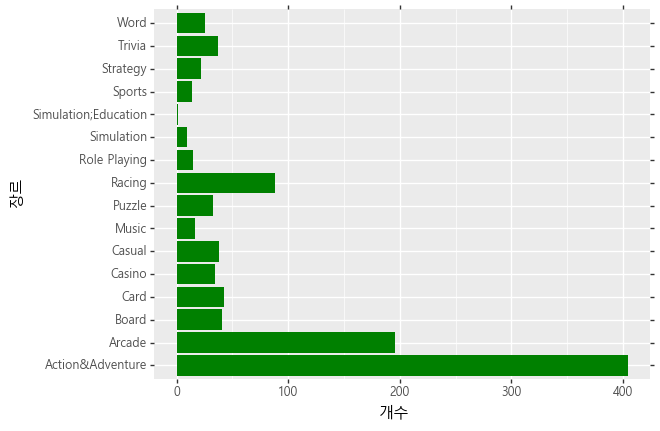

<ggplot: (140995967485)>

In [87]:
(ggplot(game_df)
 +aes(x='장르', y='개수')
 +geom_bar(stat='identity', fill='green')
 +coord_flip()
 +theme(text=element_text(family='Malgun Gothic'))
)

# 액션&어드벤쳐 장르 게임 수가 압도적으로 많다.

In [88]:
# 그렇다면 액션&어드벤쳐 게임들 중에서 가장 고객들이 많이 찾고 만족해하는 게임의 이름은 무엇일까?
# 액션&어드벤쳐 게임들 데이터만 추출해보자.

action_df = game.loc[game['장르'] == 'Action&Adventure']
action_df.shape

(404, 12)

In [89]:
action_df.head()

,앱이름,분류,평가,리뷰개수,앱용량MB,앱설치횟수(이상),무료/유료앱,앱가격($),앱의타겟연령층,앱장르,평점대,장르
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,4,Action&Adventure
1661,Temple Run 2,GAME,4.3,8118609,62.0,500000000,Free,0.0,Everyone,Action,4,Action&Adventure
1663,Helix Jump,GAME,4.2,1497361,33.0,100000000,Free,0.0,Everyone,Action,4,Action&Adventure
1669,Zombie Hunter King,GAME,4.3,10306,50.0,1000000,Free,0.0,Mature 17+,Action,4,Action&Adventure
1693,Zombie Catchers,GAME,4.7,990491,75.0,10000000,Free,0.0,Everyone,Action,4,Action&Adventure


In [90]:
# 인기 있는 앱을 증명하는 척도인 '평가', '앱설치횟수', '리뷰개수'만 출력해보자.
popular_df = action_df.loc[:,['앱이름','평가','리뷰개수','앱설치횟수(이상)']]
popular_df.head()

,앱이름,평가,리뷰개수,앱설치횟수(이상)
1653,ROBLOX,4.5,4447388,100000000
1661,Temple Run 2,4.3,8118609,500000000
1663,Helix Jump,4.2,1497361,100000000
1669,Zombie Hunter King,4.3,10306,1000000
1693,Zombie Catchers,4.7,990491,10000000


In [91]:
# 앱설치횟수(이상) 칼럼이 숫자가 너무 크므로 '만(10000)' 단위로 나누어서 가독성 있게 나타내보자
popular_df['앱설치횟수(이상)'] = popular_df['앱설치횟수(이상)'].div(10000)
popular_df.rename(columns={'앱설치횟수(이상)':'앱설치횟수(단위:만)'}, inplace=True)
popular_df.head()

,앱이름,평가,리뷰개수,앱설치횟수(단위:만)
1653,ROBLOX,4.5,4447388,10000.0
1661,Temple Run 2,4.3,8118609,50000.0
1663,Helix Jump,4.2,1497361,10000.0
1669,Zombie Hunter King,4.3,10306,100.0
1693,Zombie Catchers,4.7,990491,1000.0


In [92]:
# 앱설치횟수 정수형으로 바꿔주기
popular_df['앱설치횟수(단위:만)'] = popular_df['앱설치횟수(단위:만)'].astype(int)
popular_df.head(2)

,앱이름,평가,리뷰개수,앱설치횟수(단위:만)
1653,ROBLOX,4.5,4447388,10000
1661,Temple Run 2,4.3,8118609,50000


In [93]:
# 평가 높은 순으로 정렬
popular_df.sort_values(by=['평가'], ascending=False).head(5)

,앱이름,평가,리뷰개수,앱설치횟수(단위:만)
9056,Santa's Monster Shootout DX,5.0,4,0
4244,Zombie Catchers,4.7,989158,1000
1829,Honkai Impact 3rd,4.7,59017,100
9024,Retro City Rampage DX,4.7,416,1
2013,Dog Run - Pet Dog Simulator,4.7,48615,1000


In [96]:
# 리뷰개수가 높은 순으로 정렬
popular_df.sort_values(by=['리뷰개수'], ascending=False).head(10)

,앱이름,평가,리뷰개수,앱설치횟수(단위:만)
7937,Shadow Fight 2,4.6,10981850,10000
1932,Shadow Fight 2,4.6,10979062,10000
1764,Pokémon GO,4.1,10424925,10000
3908,Pokémon GO,4.1,10421284,10000
5417,Mobile Legends: Bang Bang,4.4,8219586,10000
1920,Temple Run 2,4.3,8119154,50000
1886,Temple Run 2,4.3,8119151,50000
1759,Temple Run 2,4.3,8118937,50000
1729,Temple Run 2,4.3,8118937,50000
1661,Temple Run 2,4.3,8118609,50000


In [95]:
# 앱설치횟수가 많은 순으로 정렬
popular_df.sort_values(by=['앱설치횟수(단위:만)'], ascending=False).head(5)

,앱이름,평가,리뷰개수,앱설치횟수(단위:만)
1661,Temple Run 2,4.3,8118609,50000
1920,Temple Run 2,4.3,8119154,50000
4041,Temple Run 2,4.3,8116142,50000
1729,Temple Run 2,4.3,8118937,50000
1759,Temple Run 2,4.3,8118937,50000


## `고객들에게 가치 있는 Game 앱 list`

- Temple Run2
- Shaow Fight 2
- Pokémon GO
- Zombie Catchers	
- Mobile Legends: Bang Bang
